In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diamonds.csv")

In [2]:
df.shape

(53940, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_ohe = pd.get_dummies(df)

In [6]:
df_ohe.shape

(53940, 28)

In [7]:
# df_ohe = df_ohe.drop(['Unnamed: 0'],axis=1)
df_ohe = df_ohe.iloc[:,1:]

In [8]:
df_ohe.shape

(53940, 27)

In [9]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

In [10]:
X = df_ohe

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # standardization 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test = train_test_split(X,
                                  test_size=0.3,
                                  random_state=7)

In [14]:
X_train.shape,X_test.shape

((37758, 27), (16182, 27))

In [15]:
from sklearn.cluster import KMeans

In [16]:
mykmeans = KMeans(3,random_state=7)

In [17]:
# fit function for training
mykmeans.fit(X_train)

KMeans(n_clusters=3, random_state=7)

In [18]:
# Do the predictions / testing
cluster_nos = mykmeans.predict(X_test)

In [19]:
#X_test.iloc[0,:]

In [20]:
cluster_nos[0]

2

In [21]:
cluster_nos.shape, X_test.shape

((16182,), (16182, 27))

In [22]:
#X_test.loc[cluster_nos == 0,:].shape

In [23]:
#X_test.loc[cluster_nos == 1,:].shape

In [24]:
#X_test.loc[cluster_nos == 2,:].shape

Number of clusters: 300
Outliers : 232


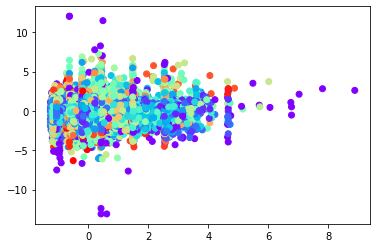

In [35]:
y_pred = DBSCAN(eps=2.75, min_samples=3).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

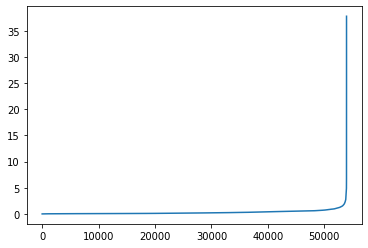

In [36]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [38]:
from sklearn.metrics import silhouette_score


In [39]:
silhouette_score(X, cluster_nos)

ValueError: Found input variables with inconsistent numbers of samples: [53940, 16182]

# How to decide value of k?

we iterate over few values of k ( generally 2 to 10)

plot graph of inertia ( WCSS within cluster sum of squares)

Check the L-bow and decide right k

In [26]:
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

In [27]:
inertia_values

[880918.5892892384,
 838355.9332316958,
 808708.6053423327,
 768457.1867936465,
 741838.2210534625,
 722395.1320739744,
 670617.2102559558,
 632651.5576911947,
 615669.4472455353]

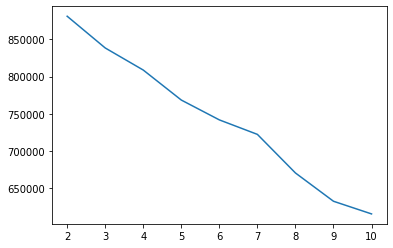

In [28]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

# Evaluation Parameters

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm
silhouette_score(X_test, cluster_nos)

0.08315813915443342